# **Customer soft Churn Analysis using RFM and logistic regression**

In [ ]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/RetailStoreData.xlsx', sheet_name=None)  # Load both sheets
data = pd.concat(data.values(), ignore_index=True)  # Merge sheets into one DataFrame

# Display the first few rows of the data
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# **Exploratory Data Analysis**

In [ ]:
data.tail()
# Check for missing values
data.isnull().sum()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dropna(subset=['Customer ID'], inplace=True)  # Drop rows with missing CustomerID
data = data[data['Quantity'] > 0]  # Remove negative or zero quantities (returns)
data = data[data['Price'] > 0]  # Remove zero or negative prices


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='StockCode', ylabel='Revenue'>

Text(0.5, 1.0, 'Top 5 Products by Revenue')

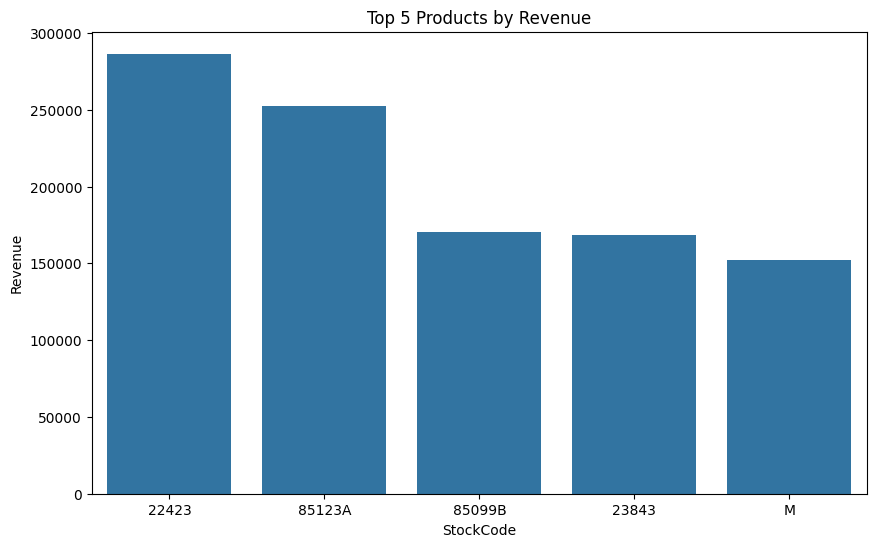

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Country', ylabel='Revenue'>

Text(0.5, 1.0, 'Country-wise Revenue')

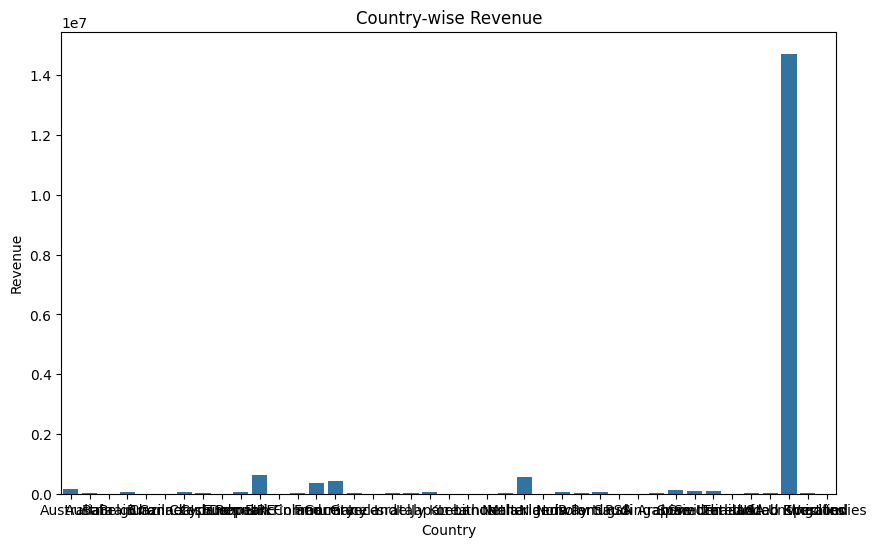

,0
Country,West Indies
Invoice,33541
Revenue,14723147.517


,0
Country,Australia
Invoice,1
Revenue,140.39


,Country,Invoice,Revenue
0,Australia,95,169968.11
1,Austria,45,23613.01
2,Bahrain,4,1354.37
3,Belgium,149,65753.42
4,Brazil,2,1411.87


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Revenue column
data['Revenue'] = data['Quantity'] * data['Price']

# Group by StockCode to get product-level insights
product_sales = data.groupby('StockCode').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Top 5 products by sales
top_products = product_sales.sort_values(by='Revenue', ascending=False).head()

# Plot revenue distribution by product
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='Revenue', data=top_products)
plt.title('Top 5 Products by Revenue')
plt.show()


# Country-wise transactions
country_sales = data.groupby('Country').agg({
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).reset_index()

# Plot country-wise revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=country_sales)
plt.title('Country-wise Revenue')
plt.show()

country_sales.max()
country_sales.min()
country_sales.head()



# **Exploring relationships within the dataset**

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

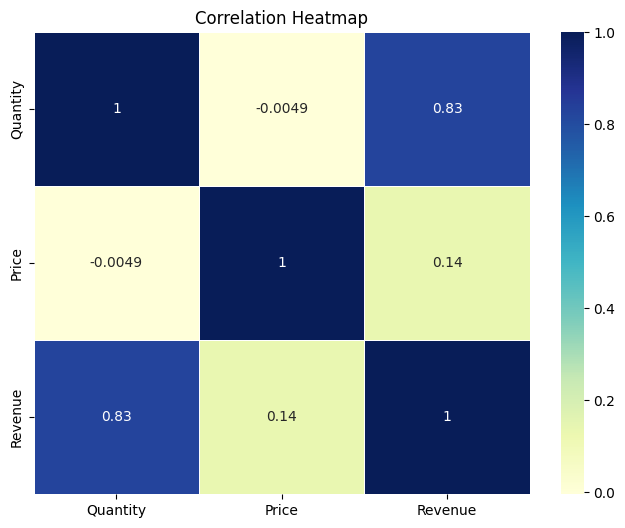

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Quantity', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Price')

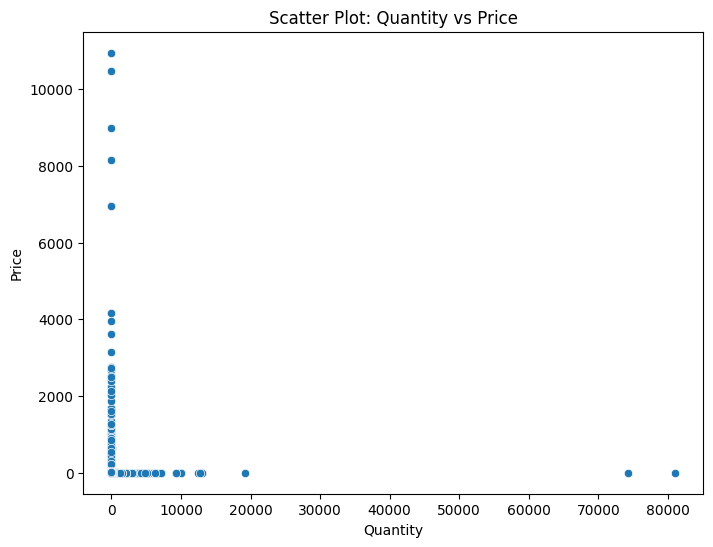

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Price', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Price vs Revenue')

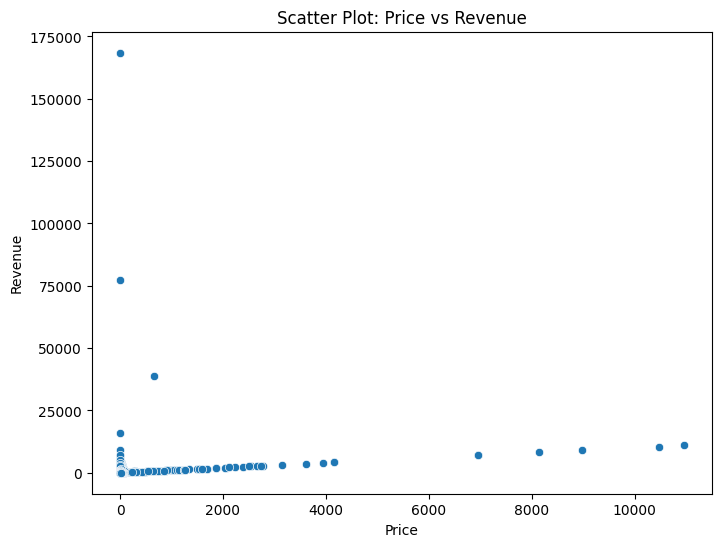

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Quantity', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Revenue')

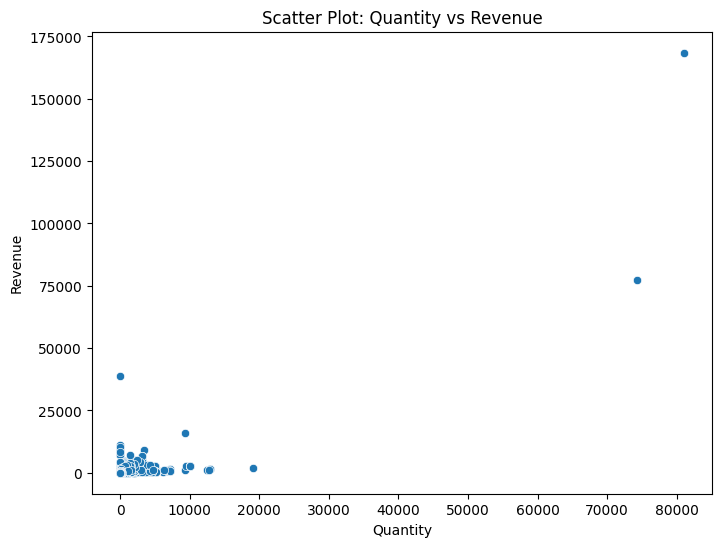

In [ ]:
# 1. Heatmap: Visualize correlations between numerical variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Quantity', 'Price', 'Revenue']].corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Scatter Plot: Quantity vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Price', data=data)
plt.title('Scatter Plot: Quantity vs Price')
plt.show()

# 3. Scatter Plot: Price vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Revenue', data=data)
plt.title('Scatter Plot: Price vs Revenue')
plt.show()

# 4. Scatter Plot: Quantity vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Revenue', data=data)
plt.title('Scatter Plot: Quantity vs Revenue')
plt.show()

High multicollinearity (like between Quantity and Revenue) can negatively impact the logistic regression model, as it assumes independent features.


The scatter plot shows a non-linear relationship between Quantity and Price, with most data points clustered at low quantity and low price, and a few outliers in the high ranges.

There are clear outliers for both Quantity and Price, which might affect the performance of a logistic regression model, as it is sensitive to extreme values.

**Why not to  do handling outliers, feature scaling, and dealing with multicollinearity before RFM Matrix**

The RFM metrics are derived based on transactional data (like purchase history) and are designed to segment customers based on their purchasing behavior

These metrics are typically calculated first to create meaningful summaries about customer behavior.

**We need to filter data within 9 months from the reference date (latest transaction date).**

In [ ]:
reference_date = data['InvoiceDate'].max()

# Create filters for 9 months
nine_months_ago = reference_date - pd.DateOffset(months=9)

# Data within 9 months
data_9m = data[data['InvoiceDate'] >= nine_months_ago]

# Display the first few rows of the filtered data
data_9m.head()

data_9m.to_csv('data_9m.csv', index=False)
from google.colab import files
files.download('data_9m.csv')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
640699,546113,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-03-09 13:18:00,2.95,14344.0,United Kingdom,5.90
640700,546113,22804,CANDLEHOLDER PINK HANGING HEART,3,2011-03-09 13:18:00,2.95,14344.0,United Kingdom,8.85
640701,546113,20998,ROSE DU SUD OVEN GLOVE,1,2011-03-09 13:18:00,2.95,14344.0,United Kingdom,2.95
640702,546113,21114,LAVENDER SCENTED FABRIC HEART,5,2011-03-09 13:18:00,1.25,14344.0,United Kingdom,6.25
640703,546113,84531B,BLUE KNITTED EGG COSY,1,2011-03-09 13:18:00,0.39,14344.0,United Kingdom,0.39


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**For 9 months: Recency, Frequency, Monetary**

In [ ]:
# Calculate total price
data_9m['TotalPrice'] = data_9m['Price'] * data_9m['Quantity']

reference_date = data_9m['InvoiceDate'].max()  # Use the last transaction as the reference date

def calculate_recency(dates): #dates = pd.Series(['2023-01-01', '2023-01-05', '2023-01-09'], dtype='datetime64[ns]')
    return (reference_date - dates.max()).days  #Days between the last transaction of dataset date
                                                       #and last transaction of date of each customer.

# Group by CustomerID to calculate Frequency and Monetary
rfm_9m = data_9m.groupby('Customer ID').agg({
    'InvoiceDate': calculate_recency,
    'Invoice': 'nunique',  #no of time transaction has done
    'TotalPrice': 'sum'  # sum of totalprice (Monetary value)
}).reset_index()

rfm_9m.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

print("\n RFM Matrix for 9 Months")

rfm_9m.head()

# Define the target variable based on the condition
rfm_9m['Target'] = ((rfm_9m['Recency'] < 30) &
                 (rfm_9m['Frequency'] > 5) &
                 (rfm_9m['Monetary'] > 1000)).astype(int) #gives boolean mask .astype(int) converts into binary implicitly


rfm_9m.head()


rfm_9m.to_csv('rfm_9m.csv', index=False)
from google.colab import files
files.download('rfm_9m.csv')



<ipython-input-8-22f11468b574>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_9m['TotalPrice'] = data_9m['Price'] * data_9m['Quantity']



 RFM Matrix for 9 Months


,Customer ID,Recency,Frequency,Monetary
0,12347.0,1,5,3122.82
1,12348.0,74,2,677.00
2,12349.0,18,1,1757.55
3,12352.0,35,5,1224.89
4,12353.0,203,1,89.00


,Customer ID,Recency,Frequency,Monetary,Target
0,12347.0,1,5,3122.82,0
1,12348.0,74,2,677.00,0
2,12349.0,18,1,1757.55,0
3,12352.0,35,5,1224.89,0
4,12353.0,203,1,89.00,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

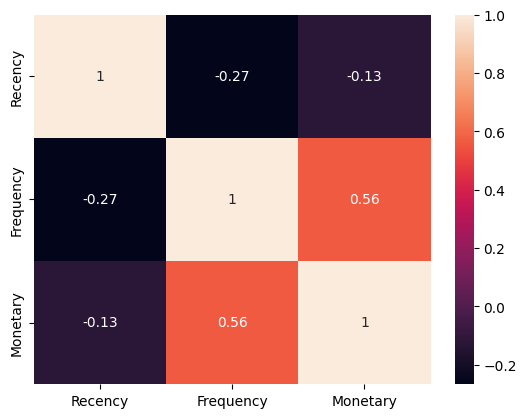

In [ ]:
heatmap = rfm_9m[['Recency','Frequency','Monetary']].corr()

sns.heatmap(heatmap, annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x795037e80f40>,
 'caps': [<matplotlib.lines.Line2D at 0x795037e81480>,
 'boxes': [<matplotlib.lines.Line2D at 0x795037e80ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x795037e819c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x795037e81c60>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Recency')

{'whiskers': [<matplotlib.lines.Line2D at 0x795037e82230>,
 'caps': [<matplotlib.lines.Line2D at 0x795037e82770>,
 'boxes': [<matplotlib.lines.Line2D at 0x795037e820b0>],
 'medians': [<matplotlib.lines.Line2D at 0x795037e82a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x795037e82d10>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x795037e832e0>,
 'caps': [<matplotlib.lines.Line2D at 0x795037e83820>,
 'boxes': [<matplotlib.lines.Line2D at 0x795037e83160>],
 'medians': [<matplotlib.lines.Line2D at 0x795037e83d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x79503fdc0040>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Monetary')

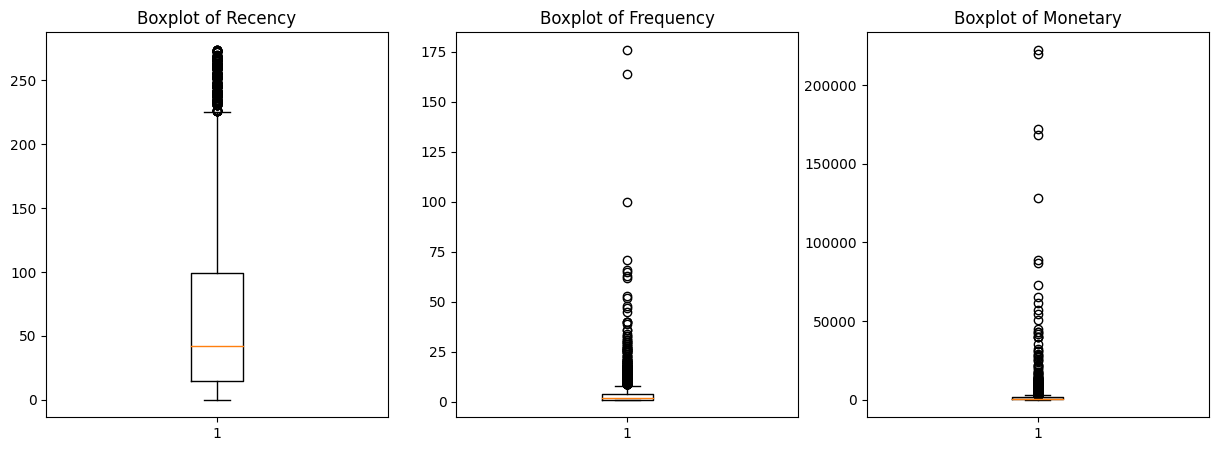

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(rfm_9m['Recency'])
axes[0].set_title('Boxplot of Recency')

axes[1].boxplot(rfm_9m['Frequency'])
axes[1].set_title('Boxplot of Frequency')

axes[2].boxplot(rfm_9m['Monetary'])
axes[2].set_title('Boxplot of Monetary')

plt.show()


<Axes: xlabel='Recency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Monetary')

<Axes: xlabel='Frequency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Frequency vs Monetary')

<Axes: xlabel='Recency', ylabel='Frequency'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Frequency')

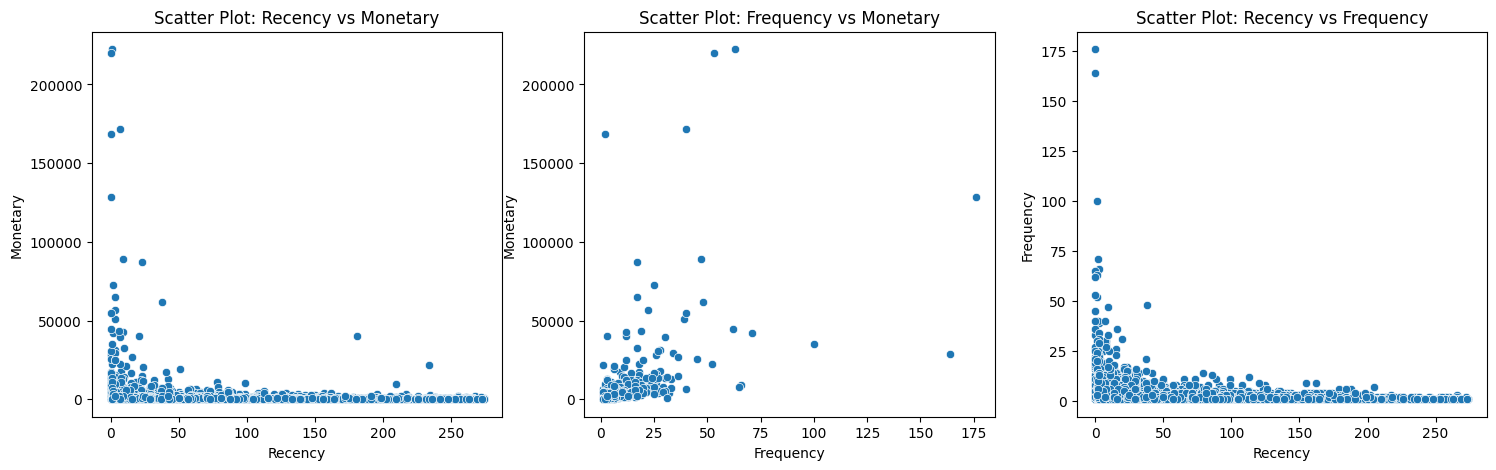

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusting figure size for better spacing

# 1. Scatter Plot: Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', data=rfm_9m, ax=axes[0])
axes[0].set_title('Scatter Plot: Recency vs Monetary')

# 2. Scatter Plot: Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_9m, ax=axes[1])
axes[1].set_title('Scatter Plot: Frequency vs Monetary')

# 3. Scatter Plot: Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', data=rfm_9m, ax=axes[2])
axes[2].set_title('Scatter Plot: Recency vs Frequency')

plt.show()

# **Log Transformation**

In [ ]:
rfm_9m[['Recency', 'Frequency', 'Monetary']] = np.log1p(rfm_9m[['Recency', 'Frequency', 'Monetary']])

rfm_9m.head()

,Customer ID,Recency,Frequency,Monetary,Target
0,12347.0,0.693147,1.791759,8.046812,0
1,12348.0,4.317488,1.098612,6.519147,0
2,12349.0,2.944439,0.693147,7.472245,0
3,12352.0,3.583519,1.791759,7.111422,0
4,12353.0,5.318120,0.693147,4.499810,0


In [ ]:
rfm_9m.describe()

,Customer ID,Recency,Frequency,Monetary,Target
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000
mean,15302.296977,3.581078,1.280219,6.521290,0.132242
std,1715.786139,1.353261,0.634269,1.220571,0.338796
min,12347.000000,0.000000,0.693147,1.974081,0.000000
25%,13822.250000,2.772589,0.693147,5.708438,0.000000
50%,15297.500000,3.761200,1.098612,6.467613,0.000000
75%,16777.750000,4.605170,1.609438,7.317745,0.000000
max,18287.000000,5.616771,5.176150,12.311968,1.000000


# **Plotting After Transformation of data**

{'whiskers': [<matplotlib.lines.Line2D at 0x79503b2a2c20>,
 'caps': [<matplotlib.lines.Line2D at 0x79503b2a3160>,
 'boxes': [<matplotlib.lines.Line2D at 0x79503b2a2980>],
 'medians': [<matplotlib.lines.Line2D at 0x79503b2a36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79503b2a3940>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Recency')

{'whiskers': [<matplotlib.lines.Line2D at 0x79503b2a3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x79503a460220>,
 'boxes': [<matplotlib.lines.Line2D at 0x79503b2a0ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x79503a460760>],
 'fliers': [<matplotlib.lines.Line2D at 0x79503a460a00>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x79503a460fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x79503a461510>,
 'boxes': [<matplotlib.lines.Line2D at 0x79503a460d00>],
 'medians': [<matplotlib.lines.Line2D at 0x79503a461a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79503a461cf0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Monetary')

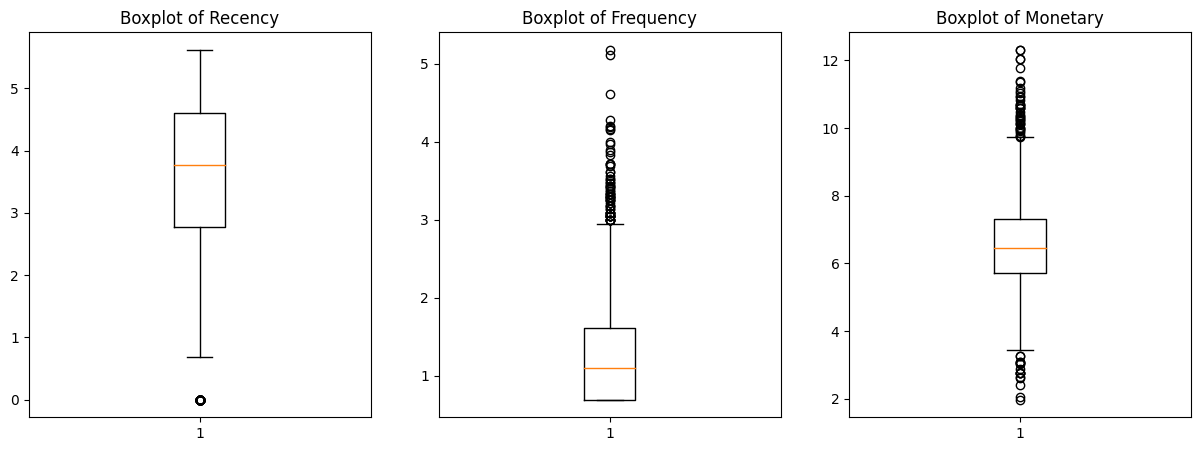

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(rfm_9m['Recency'])
axes[0].set_title('Boxplot of Recency')

axes[1].boxplot(rfm_9m['Frequency'])
axes[1].set_title('Boxplot of Frequency')

axes[2].boxplot(rfm_9m['Monetary'])
axes[2].set_title('Boxplot of Monetary')

plt.show()


<Axes: xlabel='Recency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Monetary')

<Axes: xlabel='Frequency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Frequency vs Monetary')

<Axes: xlabel='Recency', ylabel='Frequency'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Frequency')

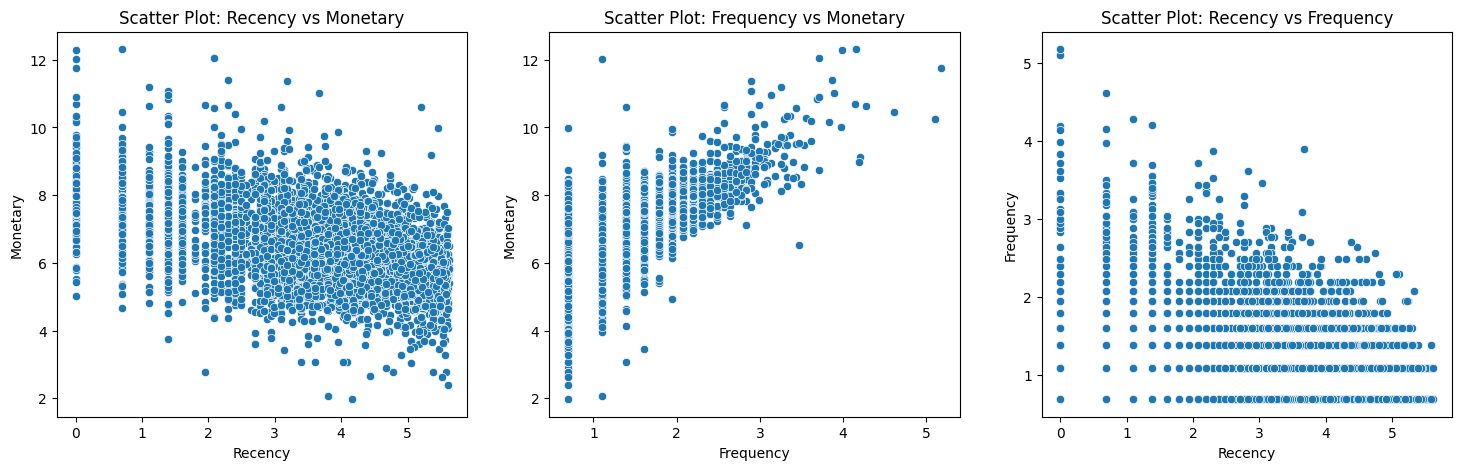

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusting figure size for better spacing

# 1. Scatter Plot: Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', data=rfm_9m, ax=axes[0])
axes[0].set_title('Scatter Plot: Recency vs Monetary')

# 2. Scatter Plot: Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_9m, ax=axes[1])
axes[1].set_title('Scatter Plot: Frequency vs Monetary')

# 3. Scatter Plot: Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', data=rfm_9m, ax=axes[2])
axes[2].set_title('Scatter Plot: Recency vs Frequency')

plt.show()

<Axes: >

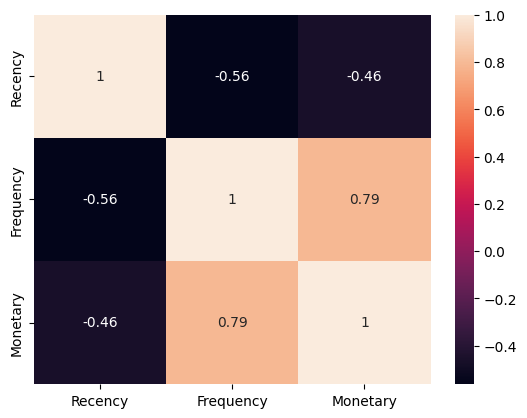

In [ ]:
heatmap = rfm_9m[['Recency','Frequency','Monetary']].corr()

sns.heatmap(heatmap, annot=True)

# **Removing Outliers using IQR Method**

In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = rfm_9m[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3 = rfm_9m[['Recency', 'Frequency', 'Monetary']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame, keeping only values within the bounds
rfm_9m_cleaned = rfm_9m[
    (rfm_9m['Recency'] >= lower_bound['Recency']) & (rfm_9m['Recency'] <= upper_bound['Recency']) &
    (rfm_9m['Frequency'] >= lower_bound['Frequency']) & (rfm_9m['Frequency'] <= upper_bound['Frequency']) &
    (rfm_9m['Monetary'] >= lower_bound['Monetary']) & (rfm_9m['Monetary'] <= upper_bound['Monetary'])
]

# Show the result after outlier removal
rfm_9m_cleaned.head()


,Customer ID,Recency,Frequency,Monetary,Target
0,12347.0,0.693147,1.791759,8.046812,0
1,12348.0,4.317488,1.098612,6.519147,0
2,12349.0,2.944439,0.693147,7.472245,0
3,12352.0,3.583519,1.791759,7.111422,0
4,12353.0,5.318120,0.693147,4.499810,0


# **Plotting After Removing outliers**

{'whiskers': [<matplotlib.lines.Line2D at 0x7950399d2fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7950399d34f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7950399d2d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7950399d3a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7950399d3cd0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Recency')

{'whiskers': [<matplotlib.lines.Line2D at 0x79503a8e42b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79503a8e4820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7950399d3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x79503a8e4d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x79503a8e5000>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x79503a8e55a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79503a8e5ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79503a8e5300>],
 'medians': [<matplotlib.lines.Line2D at 0x79503a8e6020>],
 'fliers': [<matplotlib.lines.Line2D at 0x79503a8e62c0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Monetary')

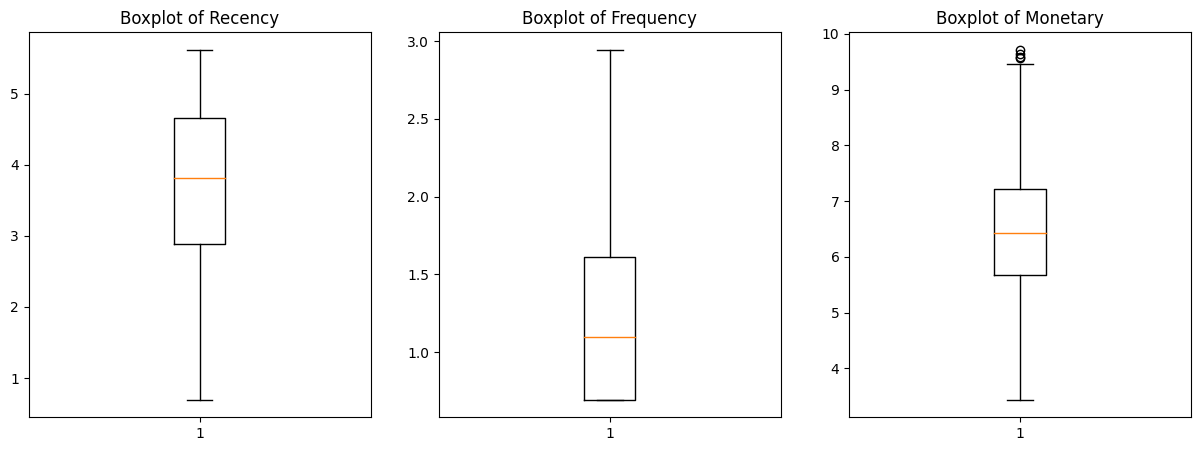

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(rfm_9m_cleaned['Recency'])
axes[0].set_title('Boxplot of Recency')

axes[1].boxplot(rfm_9m_cleaned['Frequency'])
axes[1].set_title('Boxplot of Frequency')

axes[2].boxplot(rfm_9m_cleaned['Monetary'])
axes[2].set_title('Boxplot of Monetary')

plt.show()


<Axes: xlabel='Recency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Monetary')

<Axes: xlabel='Frequency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Frequency vs Monetary')

<Axes: xlabel='Recency', ylabel='Frequency'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Frequency')

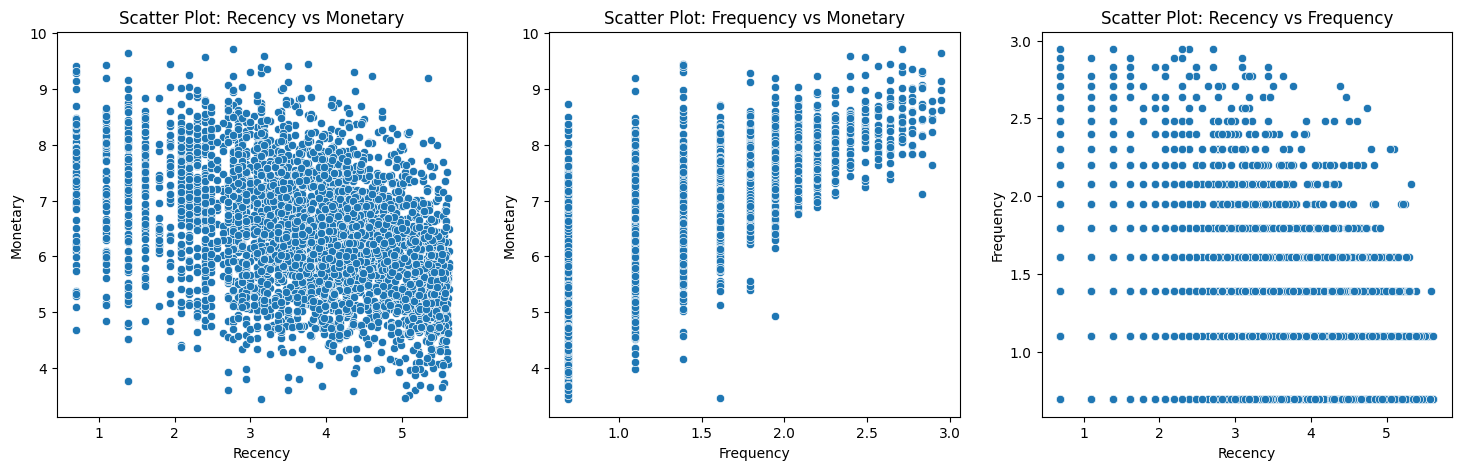

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusting figure size for better spacing

# 1. Scatter Plot: Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', data=rfm_9m_cleaned, ax=axes[0])
axes[0].set_title('Scatter Plot: Recency vs Monetary')

# 2. Scatter Plot: Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_9m_cleaned, ax=axes[1])
axes[1].set_title('Scatter Plot: Frequency vs Monetary')

# 3. Scatter Plot: Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', data=rfm_9m_cleaned, ax=axes[2])
axes[2].set_title('Scatter Plot: Recency vs Frequency')

plt.show()

([<matplotlib.patches.Wedge at 0x79503f4118a0>,
 [Text(0.5575202952277702, -0.9482463395179229, 'Churned'),
  Text(-0.5575203174230763, 0.948246326468219, 'Retained')],
 [Text(0.30410197921514737, -0.5172252761006851, '89.1%'),
  Text(-0.304101991321678, 0.5172252689826649, '10.9%')])

Text(0.5, 1.0, 'Churned vs Retained Customers')

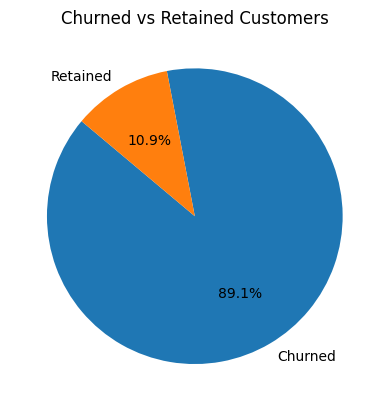

<Axes: xlabel='Recency', ylabel='Count'>

Text(0.5, 1.0, 'Recency Distribution (Churned)')

<Axes: xlabel='Frequency', ylabel='Count'>

Text(0.5, 1.0, 'Frequency Distribution (Churned)')

<Axes: xlabel='Monetary', ylabel='Count'>

Text(0.5, 1.0, 'Monetary Distribution (Churned)')

<Axes: xlabel='Recency', ylabel='Count'>

Text(0.5, 1.0, 'Recency Distribution (Retained)')

<Axes: xlabel='Frequency', ylabel='Count'>

Text(0.5, 1.0, 'Frequency Distribution (Retained)')

<Axes: xlabel='Monetary', ylabel='Count'>

Text(0.5, 1.0, 'Monetary Distribution (Retained)')

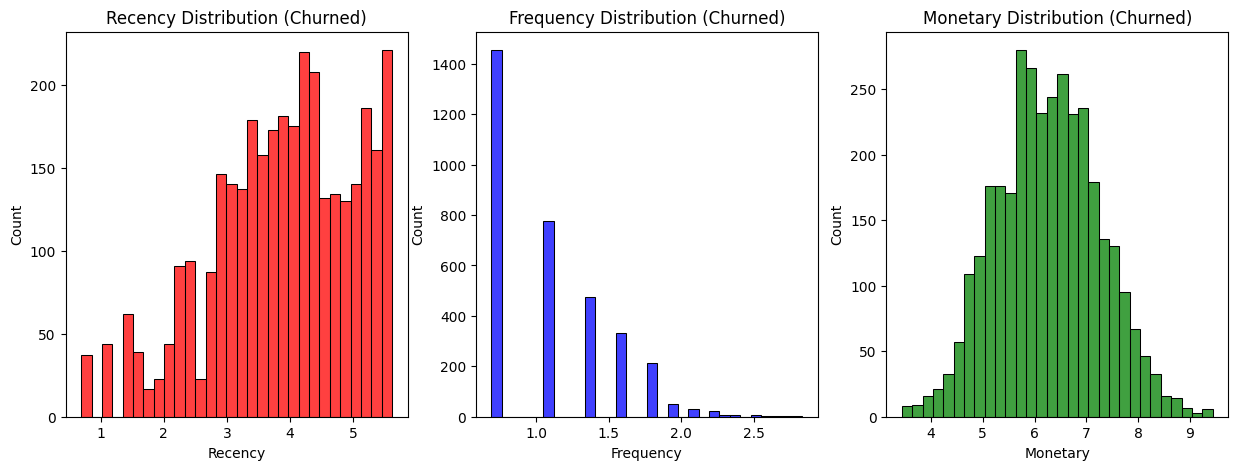

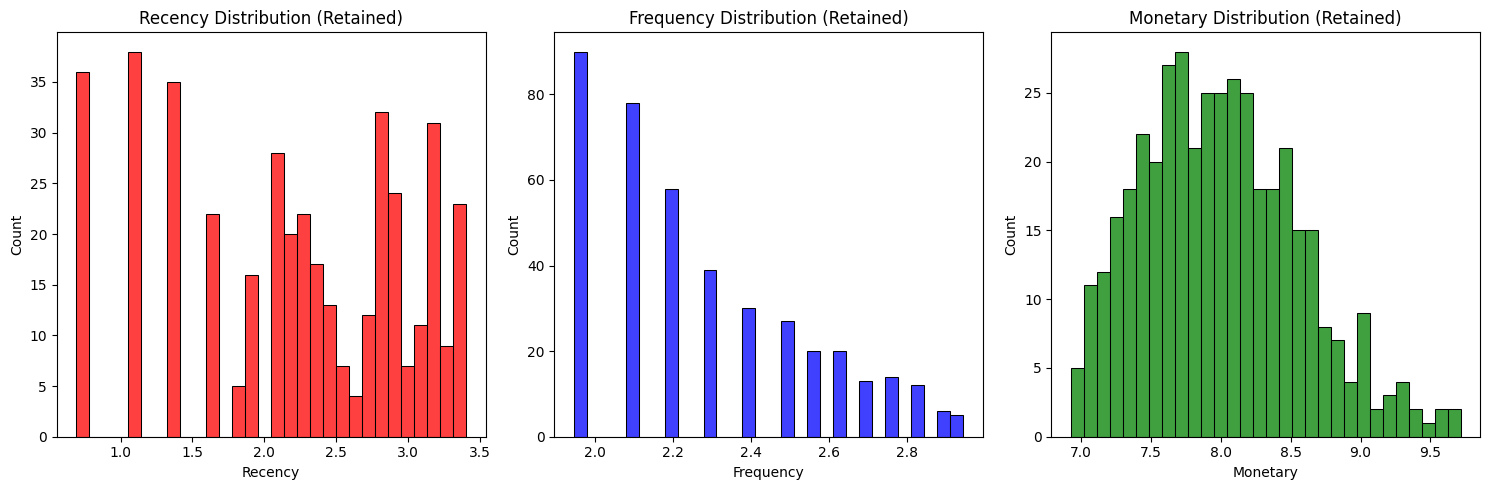

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total churned customers
churned_customers = rfm_9m_cleaned[rfm_9m_cleaned['Target'] == 0]
retained_customers = rfm_9m_cleaned[rfm_9m_cleaned['Target'] == 1]

# Churned vs Retained Pie Chart
labels = ['Churned', 'Retained']
sizes = [len(churned_customers), len(retained_customers)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churned vs Retained Customers')
plt.show()

# Characteristics of churned customers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Recency distribution
sns.histplot(churned_customers['Recency'], bins=30, ax=axes[0], color='red')
axes[0].set_title('Recency Distribution (Churned)')

# Frequency distribution
sns.histplot(churned_customers['Frequency'], bins=30, ax=axes[1], color='blue')
axes[1].set_title('Frequency Distribution (Churned)')

# Monetary distribution
sns.histplot(churned_customers['Monetary'], bins=30, ax=axes[2], color='green')
axes[2].set_title('Monetary Distribution (Churned)')



# Characteristics of Retained customers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Recency distribution
sns.histplot(retained_customers['Recency'], bins=30, ax=axes[0], color='red')
axes[0].set_title('Recency Distribution (Retained)')

# Frequency distribution
sns.histplot(retained_customers['Frequency'], bins=30, ax=axes[1], color='blue')
axes[1].set_title('Frequency Distribution (Retained)')

# Monetary distribution
sns.histplot(retained_customers['Monetary'], bins=30, ax=axes[2], color='green')
axes[2].set_title('Monetary Distribution (Retained)')

plt.tight_layout()
plt.show()


In [ ]:
rfm_9m_cleaned.Target.value_counts()

,count
Target,
0,3382
1,412


# **Logistic Regression Model**

With Resampling using SMOTE to solve class imbalancing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Set CustomerID as the index implicitly while dropping the Target column
X = rfm_9m_cleaned.set_index('Customer ID').drop(['Target'], axis=1)
y = rfm_9m_cleaned['Target']

from imblearn.over_sampling import SMOTE

# Initialize SMOTE cause before I was facing class imbalance as of 1041 support for 0 and 150 for 1
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


LogisticRegression()

Accuracy: 0.9683933274802459
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1004
           1       0.92      0.81      0.86       135

    accuracy                           0.97      1139
   macro avg       0.95      0.90      0.92      1139
weighted avg       0.97      0.97      0.97      1139



<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(33.22222222222222, 0.5, 'True Label')

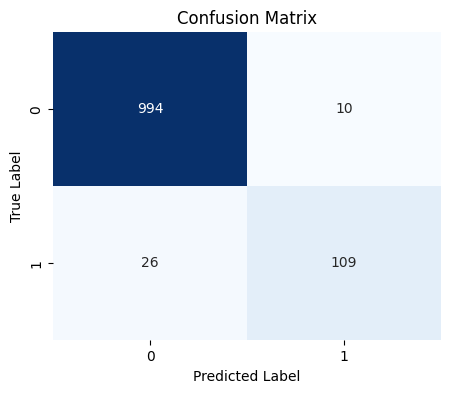

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

# **Hyper Parameter Tuning For Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers for optimization
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, class_weight='balanced')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

Best Hyperparameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


# **Result After Parameter Tuning for LG**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Use the best Logistic Regression model from GridSearchCV
best_lr_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9648814749780509
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1004
           1       0.77      1.00      0.87       135

    accuracy                           0.96      1139
   macro avg       0.89      0.98      0.93      1139
weighted avg       0.97      0.96      0.97      1139



<Figure size 500x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 14.722222222222216, 'Predicted Label')

Text(33.22222222222222, 0.5, 'True Label')

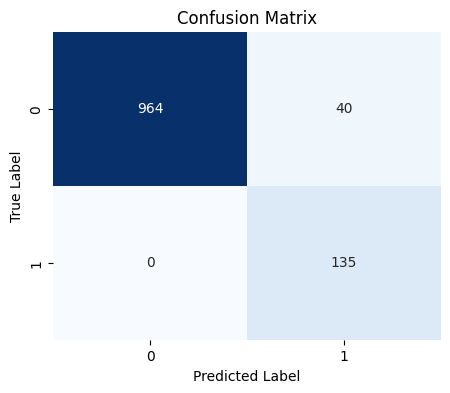

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

AUC: 0.9926811273424819


<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

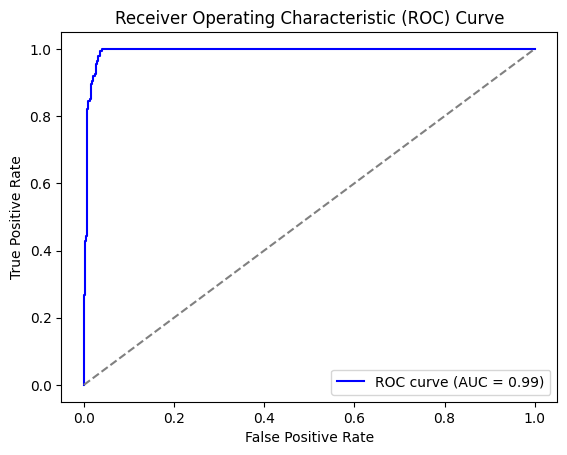

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = best_lr_model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd

# Assuming y_test and y_pred are numpy arrays or pandas Series
# Create a DataFrame to combine them
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Optionally, add an index to easily identify rows (e.g., CustomerID)
comparison_df['CustomerID'] = X_test.index  # assuming X_test has the same index as the original data

# Rearrange the columns (if needed)
comparison_df = comparison_df[['CustomerID', 'Actual', 'Predicted']]

# Display the combined DataFrame
comparison_df.head()


,CustomerID,Actual,Predicted
313,12783.0,1,1
3215,17135.0,0,0
1429,14484.0,0,0
3273,17230.0,0,0
2525,16115.0,1,1


([<matplotlib.patches.Wedge at 0x79503050d9f0>,
 [Text(0.4181860771200454, -1.017408671529267, 'Churned'),
  Text(-0.4181860771200453, 1.017408671529267, 'Retained')],
 [Text(0.22810149661093382, -0.5549501844705091, '84.6%'),
  Text(-0.22810149661093376, 0.5549501844705091, '15.4%')])

Text(0.5, 1.0, 'Churned vs Retained Customers')

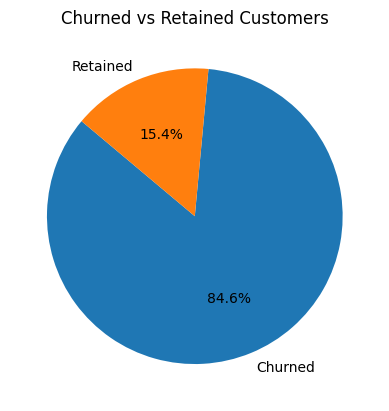

In [ ]:
# Plot total churned customers
churned_customers = comparison_df[comparison_df['Predicted'] == 0]
retained_customers = comparison_df[comparison_df['Predicted'] == 1]

# Churned vs Retained Pie Chart
labels = ['Churned', 'Retained']
sizes = [len(churned_customers), len(retained_customers)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churned vs Retained Customers')
plt.show()

# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Set CustomerID as the index implicitly while dropping the Target column
X = rfm_9m_cleaned.set_index('Customer ID').drop(['Target'], axis=1)
y = rfm_9m_cleaned['Target']


# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       1.00      1.00      1.00       135

    accuracy                           1.00      1139
   macro avg       1.00      1.00      1.00      1139
weighted avg       1.00      1.00      1.00      1139



In [ ]:
X_test.head()
y_test.head()
y_pred

,Recency,Frequency,Monetary
Customer ID,,,
12783.0,0.693147,1.945910,7.708370
17135.0,2.772589,1.791759,6.461749
14484.0,3.912023,0.693147,5.777405
17230.0,5.575949,0.693147,5.320079
16115.0,2.302585,2.079442,7.333115


,Target
313,1
3215,0
1429,0
3273,0
2525,1


array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1004
           1       1.00      1.00      1.00       135

    accuracy                           1.00      1139
   macro avg       1.00      1.00      1.00      1139
weighted avg       1.00      1.00      1.00      1139



<Axes: >

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 23.52222222222222, 'Predicted Label')

Text(50.722222222222214, 0.5, 'True Label')

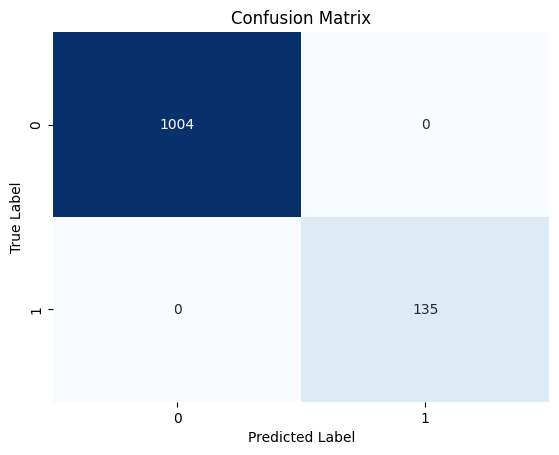

In [ ]:
# Use the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd

# Assuming y_test and y_pred are numpy arrays or pandas Series
# Create a DataFrame to combine them with Recency, Frequency, Monetary from X_test
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
})

# Optionally, add an index to easily identify rows (e.g., CustomerID)
comparison_df['CustomerID'] = X_test.index  # assuming X_test has the same index as the original data

# Rearrange the columns (if needed)
comparison_df = comparison_df[['CustomerID','Actual', 'Predicted']]

# Display the combined DataFrame
comparison_df.head()


,CustomerID,Actual,Predicted
313,12783.0,1,1
3215,17135.0,0,0
1429,14484.0,0,0
3273,17230.0,0,0
2525,16115.0,1,1


([<matplotlib.patches.Wedge at 0x79503499dc60>,
 [Text(0.5276646859526063, -0.9651787291473728, 'Churned'),
  Text(-0.5276646633609685, 0.9651787414982553, 'Retained')],
 [Text(0.2878171014286943, -0.526461124989476, '88.1%'),
  Text(-0.2878170891059828, 0.526461131726321, '11.9%')])

Text(0.5, 1.0, 'Churned vs Retained Customers')

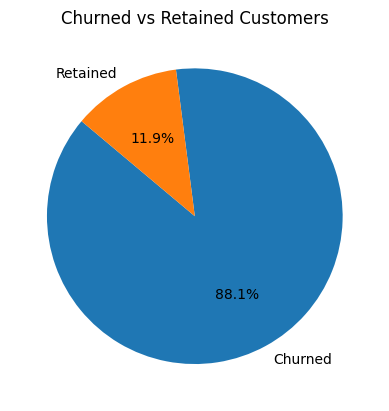

In [ ]:
# Plot total churned customers
churned_customers = comparison_df[comparison_df['Predicted'] == 0]
retained_customers = comparison_df[comparison_df['Predicted'] == 1]

# Churned vs Retained Pie Chart
labels = ['Churned', 'Retained']
sizes = [len(churned_customers), len(retained_customers)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churned vs Retained Customers')
plt.show()